# Clustering Algorithms

[Mall Customer Dataset on Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

[Overview of clustering methods](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## K-Means

In [2]:
df = pd.read_csv("../data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
X = df.select_dtypes(include=["number"]).to_numpy()
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
k = 6
model = KMeans(n_clusters=k)
y_pred = model.fit_predict(X_std)

model.cluster_centers_

array([[ 1.10728918,  0.20350983,  1.05609358, -1.27778394],
       [-1.33905697,  0.47895722, -1.30822992, -1.19644353],
       [-0.15939748, -0.85819383, -0.13072514, -0.05393049],
       [ 1.06522456, -0.44191719,  0.99158305,  1.23950275],
       [-1.34163446, -0.97602698, -1.32549704,  1.0371827 ],
       [-0.32003975,  1.25526464, -0.26166879, -0.03158663]])

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

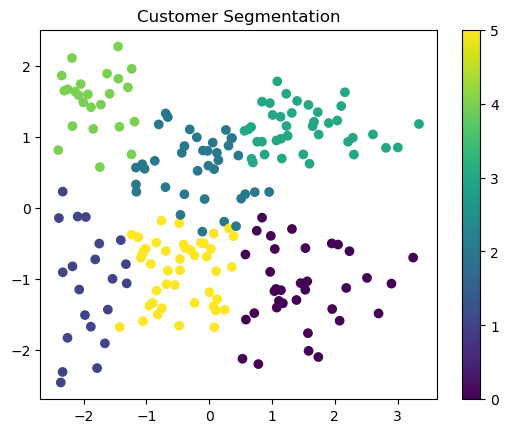

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.colorbar()
plt.title("Customer Segmentation")
plt.show()

## K-Means vs DBSCAN

In [8]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

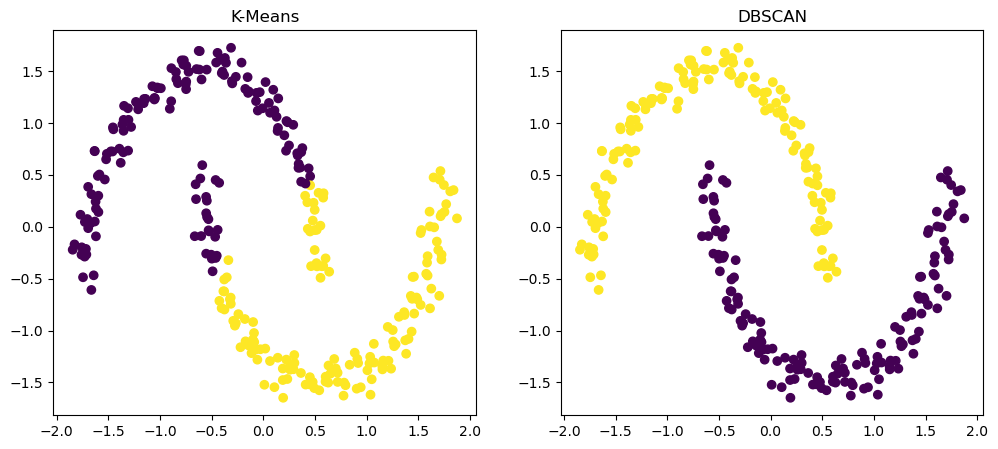

In [9]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
k_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(X)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=k_labels)
plt.title('K-Means')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=db_labels)
plt.title('DBSCAN')

plt.show()

## Agglomerative Hierarchical Clustering

In [10]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

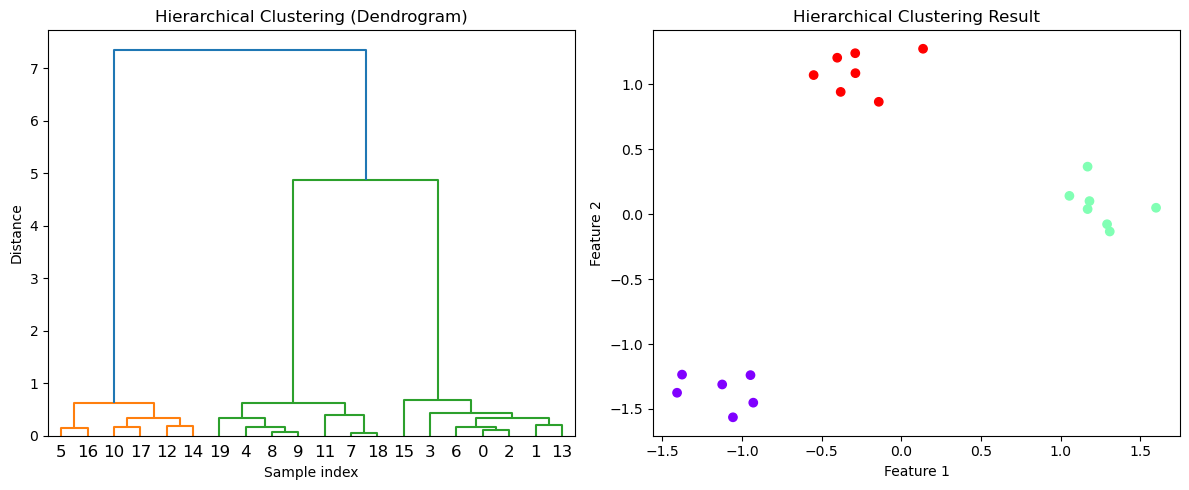

In [11]:
X, _ = make_blobs(n_samples=20, centers=3, random_state=42)
X = StandardScaler().fit_transform(X)

Z = linkage(X, method='ward')
labels = fcluster(Z, t=3, criterion='maxclust')

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(121)
dendrogram(Z)
plt.title("Hierarchical Clustering (Dendrogram)")
plt.xlabel("Sample index")
plt.ylabel("Distance")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()

plt.show()